In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('economic_index.csv')

# index price measures changes in the cost of goods/services over time to gauge inflation


In [43]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [44]:
#drop unneccessary columns
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [45]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [46]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


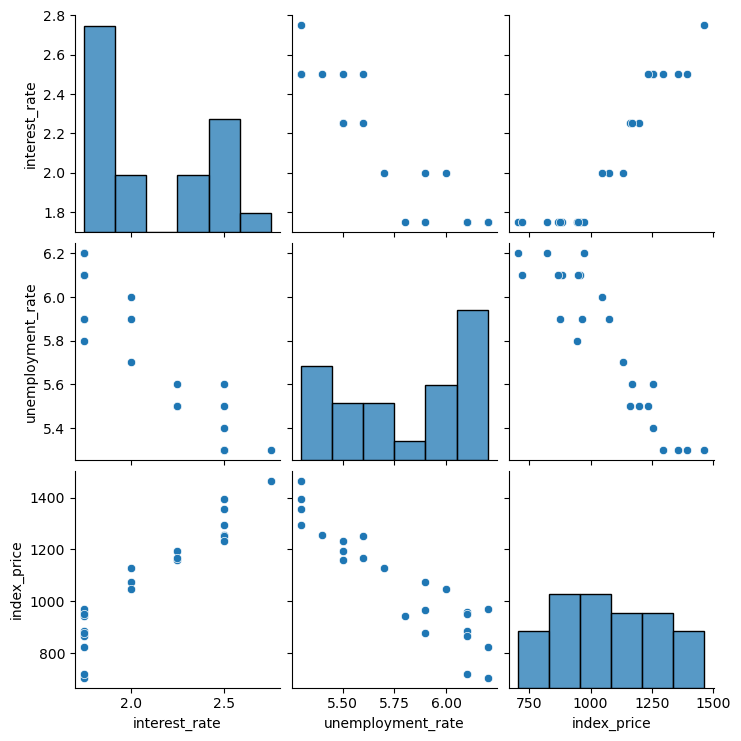

In [47]:
#visualisation
sns.pairplot(df)


In [48]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment Rate')

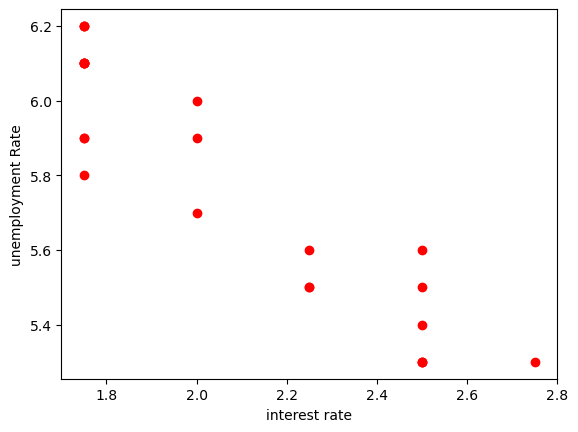

In [49]:
#visualising the datapoint
plt.scatter(df["interest_rate"],df["unemployment_rate"],color='r')
plt.xlabel("interest rate")
plt.ylabel("unemployment Rate")

In [53]:
#independent and dependent features
#X = df[["interest_rate","unemployment_rate"]]
##independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [54]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [55]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [57]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

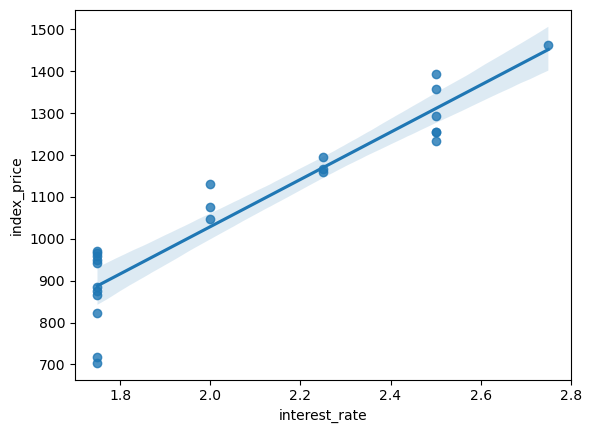

In [58]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

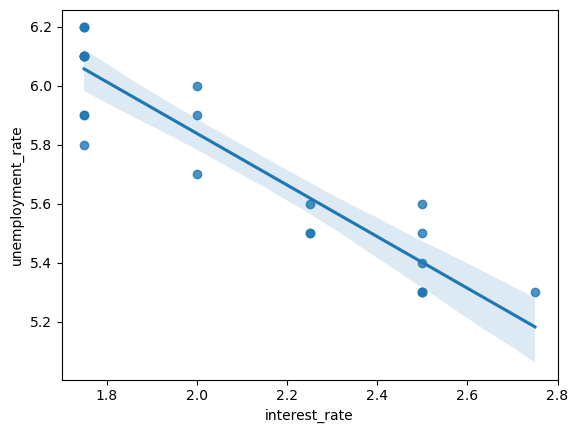

In [ ]:
sns.regplot(x=df['interest_rate'], y=df['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

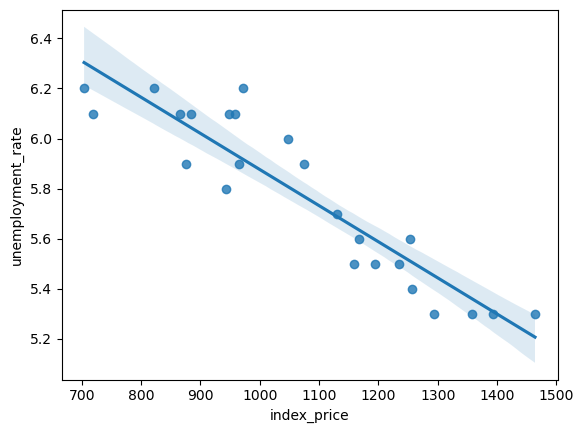

In [28]:
sns.regplot(x=df['index_price'], y=df['unemployment_rate'])

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [60]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [61]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [62]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [68]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [69]:
np.mean(validation_score)

np.float64(-5914.828180162396)

In [70]:
y_pred = regression.predict(X_test)

In [71]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [72]:
np.mean(validation_score)


np.float64(-5914.828180162396)

In [73]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306611
73.80444932337099
90.04758423359624


In [74]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.7591371539010254
0.5985619231683756


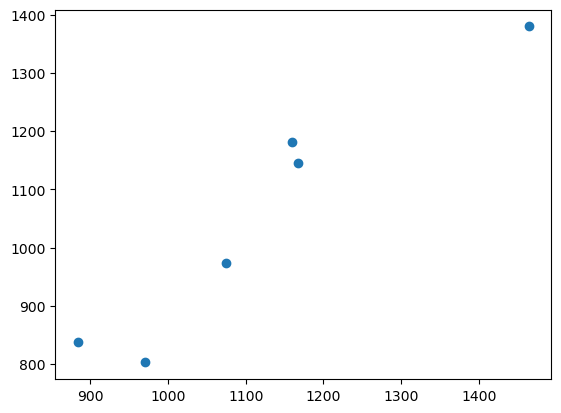

In [75]:
plt.scatter(y_test,y_pred)

In [76]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


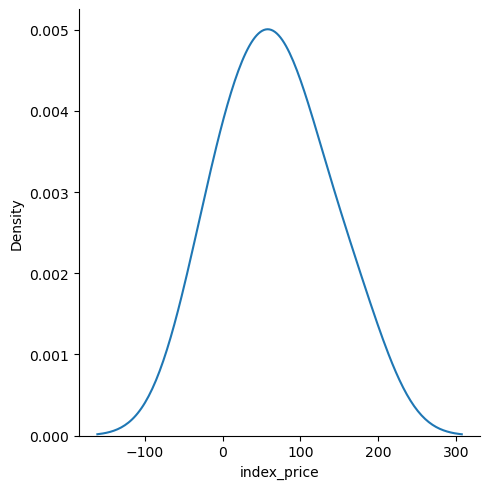

In [77]:
## Plot this residuals
sns.displot(residuals,kind='kde')

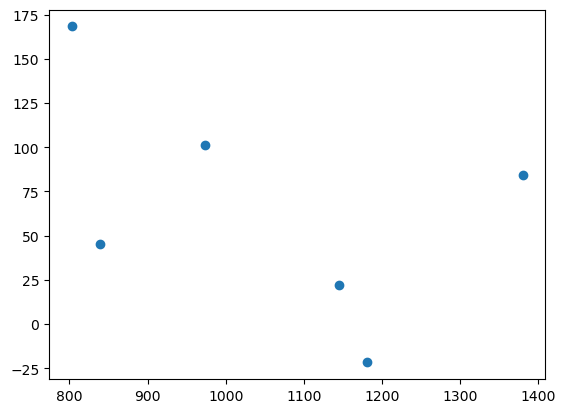

In [78]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [79]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 23 Jan 2026   Prob (F-statistic):                       0.754
Time:                        22:03:02   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
print(regression.coef_)

[  88.27275507 -116.25716066]
